In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_full = pd.read_csv('../reports/result_df.csv')
df_full['name'] = df_full.T.apply(lambda row: '_'.join([str(x) for x in row.drop(['num', 'smape', 'mase*'])]))
print(df_full.shape)
df = df_full[df_full['num'].isna()].dropna(axis=1)
df = df[df['loss'] != 'mse']
print(df.shape)

(5218, 12)
(231, 11)


In [4]:
def add_benchmarks(legend_loc=None):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.plot([-0.5, 250.5], [13.176, 13.176], ls='--', c='C3', label='M4 winner', lw=2)
    plt.plot([-0.5, 250.5], [12.913, 12.913], ls='--', c='C4', label='N-BEATS', lw=2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend(loc=legend_loc)
    
def keep_duplicates(df, column):
    
    gb = df.groupby(column)

    for group in gb.groups:
        try:
            mask.merge(gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1), how='inner')
        except NameError:
            mask = gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1)
            
    results = [gb.get_group(group).merge(mask) for group in gb.groups]
    
    return pd.concat(results)

## Comparison of all models

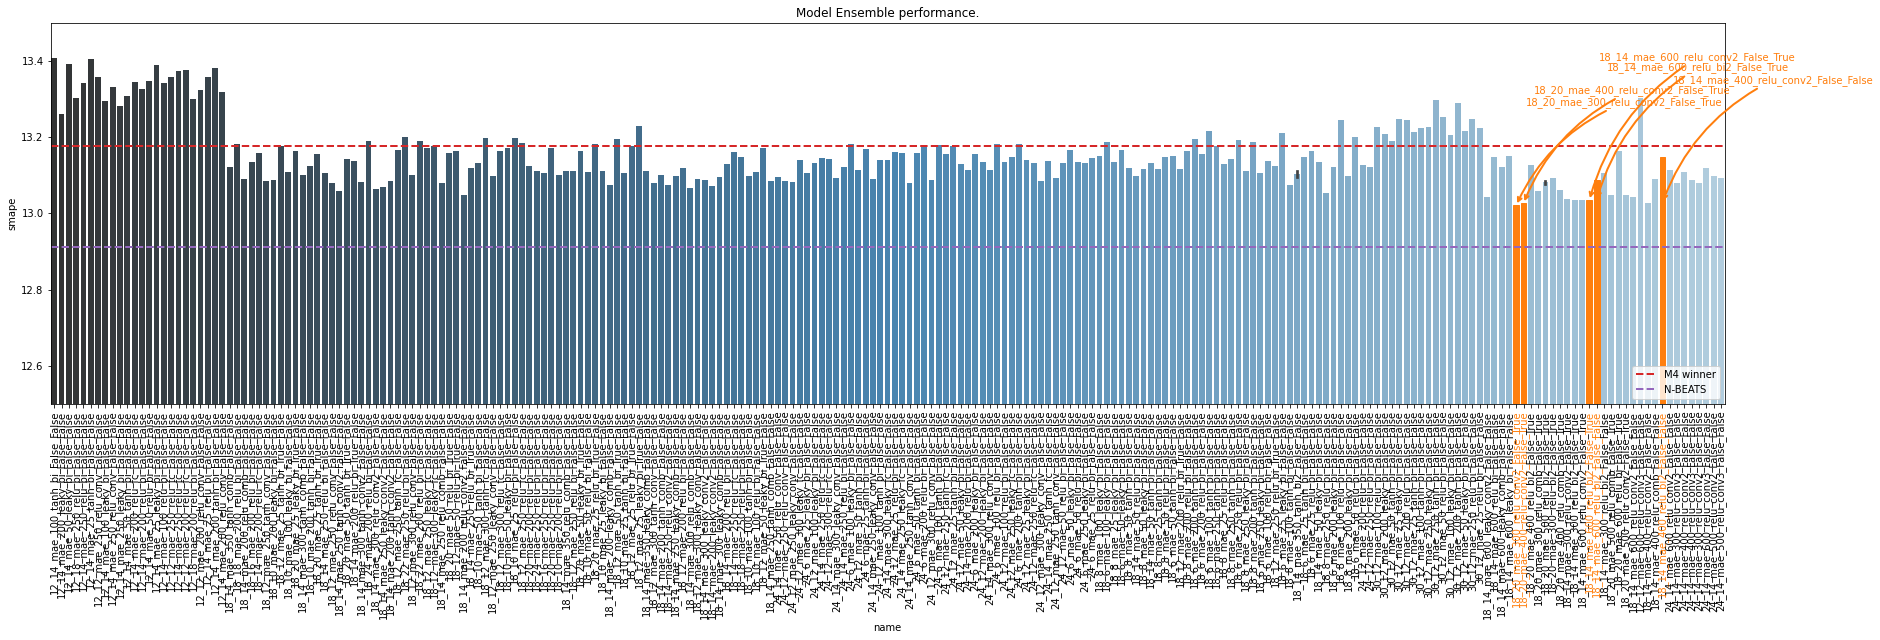

In [5]:
plt.figure(figsize=(30, 7))

top5 = df.reset_index().sort_values('smape')[:5].index

ax = sns.barplot(x='name', y='smape', data=df, palette='Blues_d')

[bar.set_color('C1') for bar in np.array(ax.get_children())[top5]]
[label.set_color('C1') for label in np.array(ax.get_xticklabels())[top5]]

for en, i in enumerate(top5):
    ax.annotate(df.iloc[i]['name'], (i, df.iloc[i]['smape']), 
                (10, 100+(en*10)), textcoords='offset points', c='C1',
                arrowprops={'arrowstyle': '->', 'color': 'C1',
                            'connectionstyle': 'arc3,rad=.2', 'lw': 2})

plt.title('Model Ensemble performance.')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks(legend_loc='lower right')

## Input size

In [6]:
df2 = df[df.drop(['name', 'input_len', 'smape', 'mase*'], axis=1).duplicated(keep=False)].drop('name', axis=1)
df2 = keep_duplicates(df2, 'input_len')

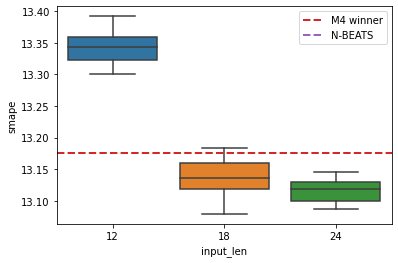

In [7]:
sns.boxplot(x='input_len', y='smape', data=df2)
add_benchmarks()

## Output size

In [8]:
df3 = keep_duplicates(df.drop('name', axis=1), 'output_len')

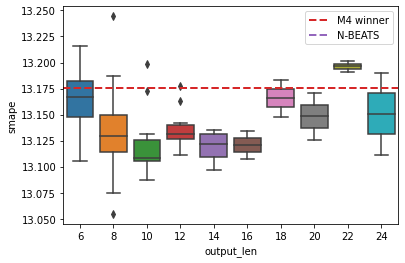

In [9]:
sns.boxplot(x='output_len', y='smape', data=df3)
add_benchmarks()

## Bottleneck

In [10]:
df4 = keep_duplicates(df.drop('name', axis=1), 'bottleneck_size')

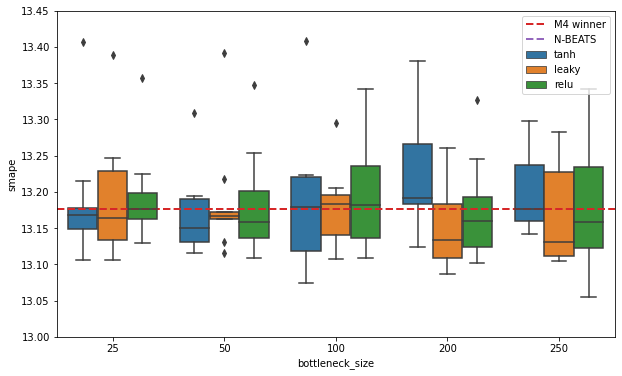

In [11]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='bottleneck_size', y='smape', data=df4, hue='bottleneck_activation')
plt.ylim([13, 13.45])
add_benchmarks()

## Model type

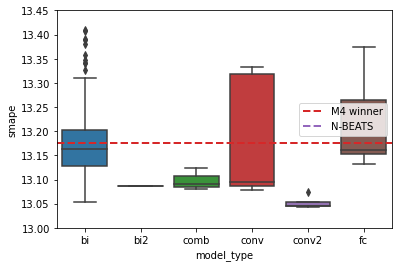

In [12]:
df5 = keep_duplicates(df.drop('name', axis=1), 'model_type')

sns.boxplot(x='model_type', y='smape', data=df5)
plt.ylim([13, 13.45])
add_benchmarks()

In [13]:
df5[(df5['model_type'] == 'conv') | (df5['model_type'] == 'conv2')]

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,line,aug,smape,mase*
0,12,14,mae,250,relu,conv,False,False,13.333047,2.507935
1,12,14,mae,200,relu,conv,False,False,13.319146,2.511919
2,18,12,mae,250,relu,conv,False,False,13.079212,2.677769
3,24,14,mae,250,relu,conv,False,False,13.095584,3.132908
4,24,12,mae,250,relu,conv,False,False,13.086462,3.131570
0,18,14,mae,200,relu,conv2,False,False,13.047135,2.671492
1,18,14,mae,250,relu,conv2,False,False,13.073925,2.682166
2,18,14,mae,600,leaky,conv2,False,False,13.044111,2.670410
3,18,14,mae,600,relu,conv2,False,False,13.044398,2.668917


### 5 best models (according to SMAPE)

In [14]:
df.sort_values('smape').head(5)

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,line,aug,smape,mase*,name
4315,18,20,mae,300,relu,conv2,False,True,13.021803,2.658603,18_20_mae_300_relu_conv2_False_True
4346,18,20,mae,400,relu,conv2,False,True,13.027056,2.669826,18_20_mae_400_relu_conv2_False_True
4912,18,14,mae,400,relu,conv2,False,False,13.027927,2.668063,18_14_mae_400_relu_conv2_False_False
4616,18,14,mae,600,relu,bi2,False,True,13.034002,2.666516,18_14_mae_600_relu_bi2_False_True
4578,18,14,mae,600,relu,conv2,False,True,13.034880,2.662831,18_14_mae_600_relu_conv2_False_True


## Line models

In [15]:
df6 = keep_duplicates(df.drop('name', axis=1), 'line')

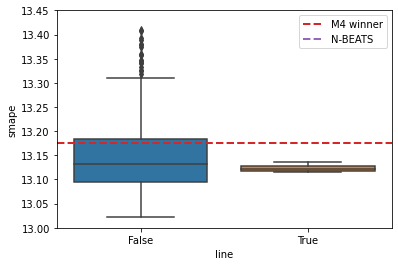

In [16]:
plt.figure(figsize=(6, 4))

sns.boxplot(x='line', y='smape', data=df6)
plt.ylim([13, 13.45])
add_benchmarks()

## 30+ model ensembles

In [17]:
df7 = df.merge(df_full[df_full['num'] == 29].drop(['num', 'smape', 'mase*'], axis=1), on='name')

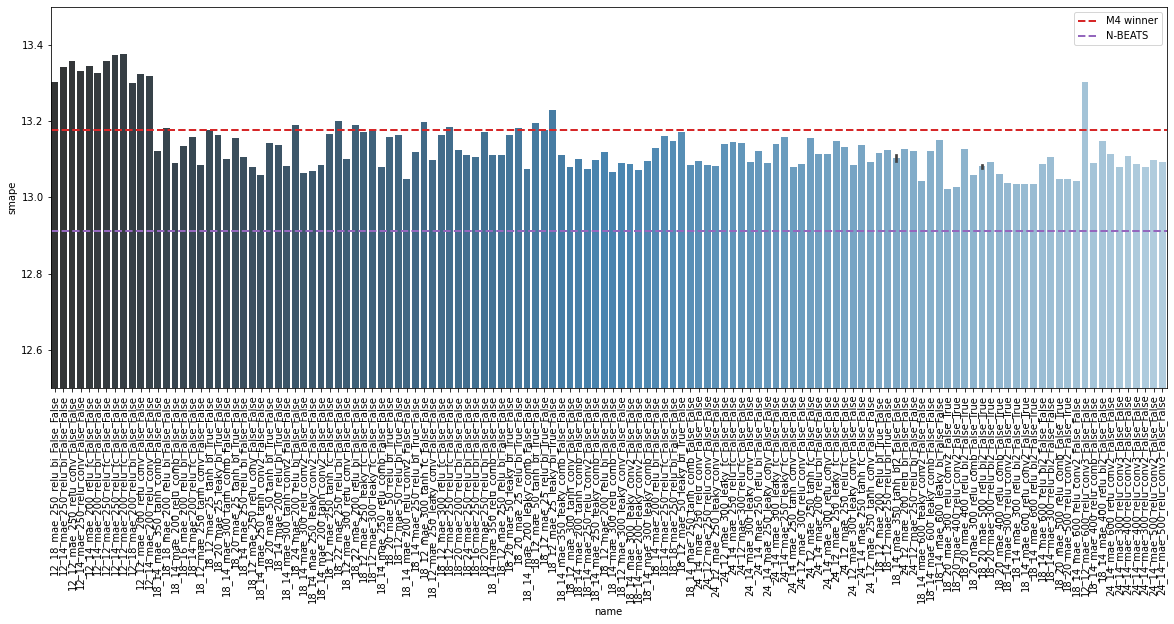

In [18]:
plt.figure(figsize=(20, 7))
sns.barplot(x='name', y='smape', data=df7, palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

## New

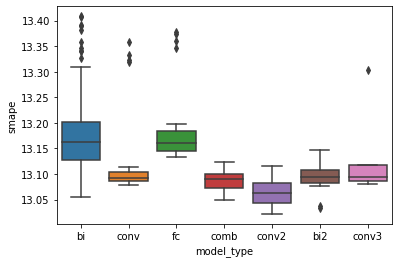

In [19]:
sns.boxplot(x='model_type', y='smape', data=df)

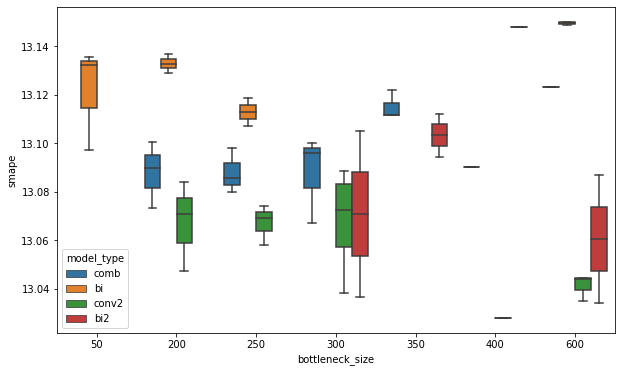

In [20]:
plt.figure(figsize=(10, 6))

df8 = df[(df['input_len'] == 18) & (df['output_len'] == 14) & (df['model_type'] != 'fc')]

sns.boxplot(x='bottleneck_size', y='smape', hue='model_type', data=df8)

### Augmentation

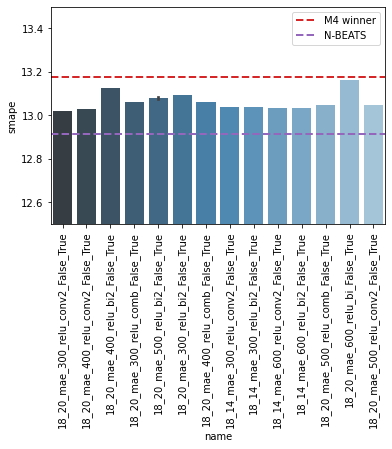

In [21]:
sns.barplot(x='name', y='smape', data=df[df['aug'] == True], palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

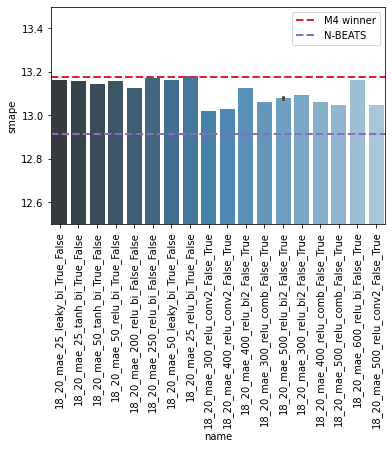

In [22]:
sns.barplot(x='name', y='smape', data=df[df['output_len'] == 20], palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

In [23]:
df[(df['aug'] == True) & (df['output_len'] != 20)]

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,line,aug,smape,mase*,name
4542,18,14,mae,300,relu,conv2,False,True,13.038303,2.672894,18_14_mae_300_relu_conv2_False_True
4576,18,14,mae,300,relu,bi2,False,True,13.036567,2.667186,18_14_mae_300_relu_bi2_False_True
4578,18,14,mae,600,relu,conv2,False,True,13.034880,2.662831,18_14_mae_600_relu_conv2_False_True
4616,18,14,mae,600,relu,bi2,False,True,13.034002,2.666516,18_14_mae_600_relu_bi2_False_True


In [24]:
df9 = df[(df['output_len'] == 14) & (df['input_len'] == 18) & (df['bottleneck_activation'] == 'relu') & ((df['bottleneck_size'] == 300) | (df['bottleneck_size'] == 600)) & ((df['model_type'] == 'conv2') | (df['model_type'] == 'bi2'))]

In [25]:
print(df9[['name', 'smape']])

                                      name      smape
1094  18_14_mae_300_relu_conv2_False_False  13.063236
4542   18_14_mae_300_relu_conv2_False_True  13.038303
4576     18_14_mae_300_relu_bi2_False_True  13.036567
4578   18_14_mae_600_relu_conv2_False_True  13.034880
4616     18_14_mae_600_relu_bi2_False_True  13.034002
4683    18_14_mae_600_relu_bi2_False_False  13.086968
4714    18_14_mae_300_relu_bi2_False_False  13.105067
4853  18_14_mae_600_relu_conv2_False_False  13.044398


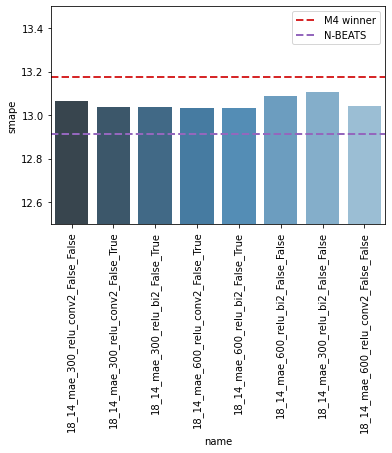

In [26]:
sns.barplot(x='name', y='smape', data=df9, palette='Blues_d')
plt.ylim([12.5, 13.5])
plt.xticks(rotation=90)

add_benchmarks()

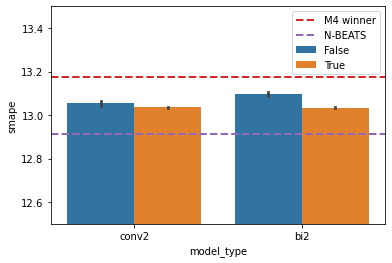

In [27]:
sns.barplot(x='model_type', y='smape', hue='aug', data=df9)
plt.ylim([12.5, 13.5])

add_benchmarks()

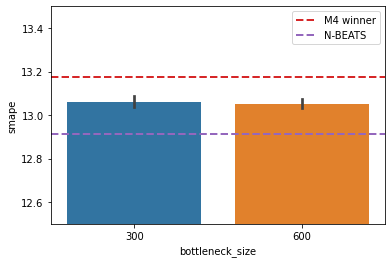

In [34]:
sns.barplot(x='bottleneck_size', y='smape', data=df9)
plt.ylim([12.5, 13.5])

add_benchmarks()

In [ ]:
sns.boxplot(x='model_type', y='smape', data=df[(df['model_type'].apply(lambda x: 'conv' in x)) & (df['input_len'] == 24)])